## Class-Assignment
1) Use the given diabetics dataset and do the following
2) Do data cleaning, visualize, and remove outliers
3) Create a correlation matrix (use seaborn heatmap), create pie diagrams for output variable
4) Do feature scaling and save the processed data as csv files

In [21]:
import pandas as pd
import numpy as np

In [2]:
dia_df = pd.read_csv('diabetes.csv')
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia_df.shape

(768, 9)

In [7]:
dia_df.duplicated().sum()
#no duplicates

np.int64(0)

In [8]:
print(dia_df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
print(dia_df['Outcome'].dtype)

int64


In [17]:
cat_cols = [col for col in dia_df.columns if dia_df[col].dtype == 'object']
num_cols = [col for col in dia_df.columns if dia_df[col].dtype != 'object']

print('categorical_columns: ',cat_cols)
print('numerical_columns: ', num_cols)

categorical_columns:  []
numerical_columns:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [18]:
dia_df[num_cols].nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [19]:
dia_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
(dia_df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [26]:
dia_df['Glucose'].replace(0, np.nan, inplace=True)
dia_df['BloodPressure'].replace(0, np.nan, inplace=True)
dia_df['SkinThickness'].replace(0, np.nan, inplace=True)
dia_df['Insulin'].replace(0, np.nan, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_13136\4100645472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dia_df['Insulin'].replace(0, np.nan, inplace=True)


In [27]:
dia_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [29]:
# i remove SkinThickness and Insulin from the data set bcs most of the data of those columns are not entered
dia_df_processed = dia_df.drop(columns=['SkinThickness', 'Insulin'])
dia_df_processed.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [31]:
# remove rows with null values
dia_df_processed.dropna(subset=['Glucose', 'BloodPressure'], inplace=True)
dia_df_processed.shape


(728, 7)

In [32]:
dia_df_processed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**fig**
- It’s the overall container for everything you draw.

**plt.tight_layout()** 
- is a Matplotlib function that automatically adjusts the spacing between subplots, labels, and titles so that nothing overlaps.

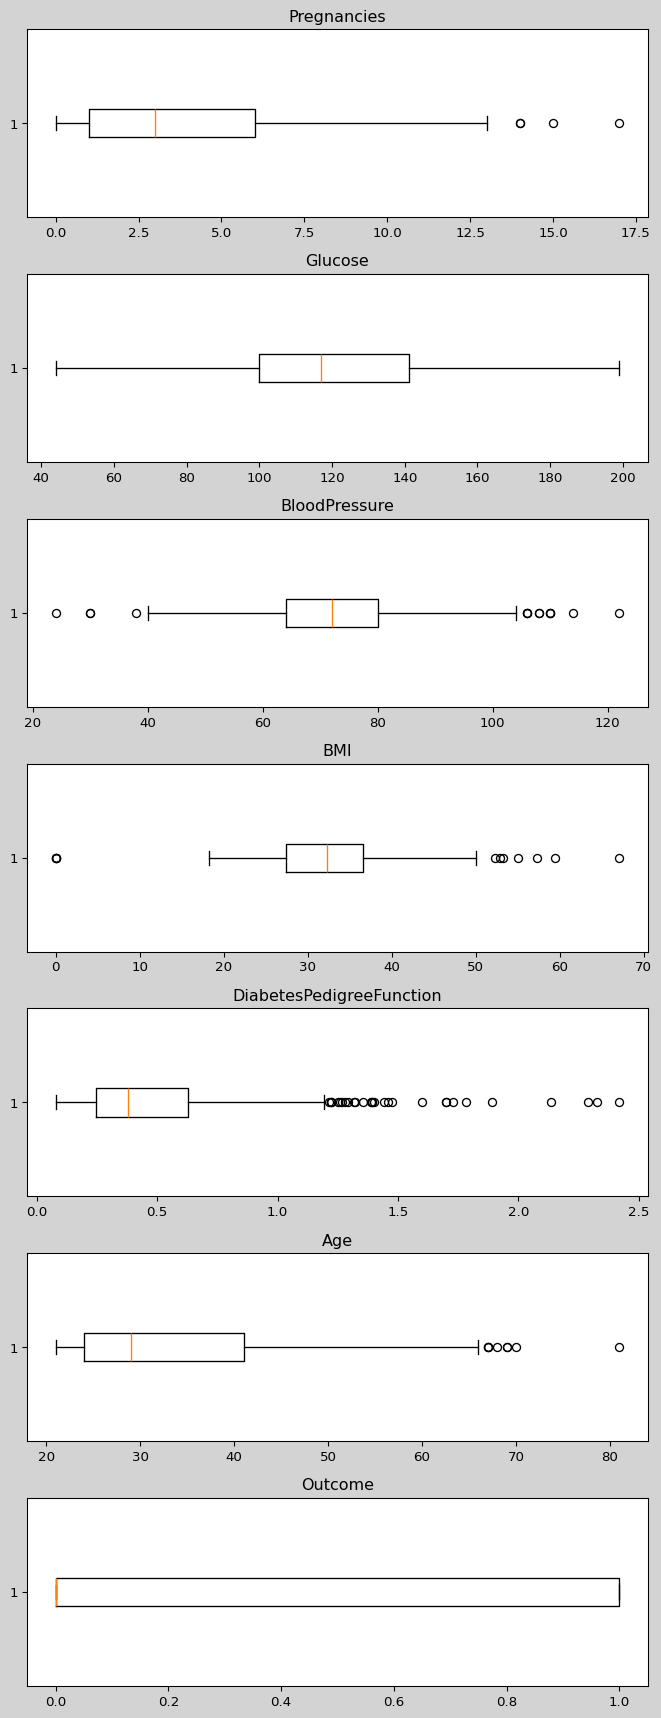

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(dia_df_processed.columns), 1, figsize=(7, 18), dpi=96) #inside(rows, columns, size, dots per inch)
for i, col in enumerate(dia_df_processed.columns):
    ax[i].boxplot(dia_df_processed[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
fig.set_facecolor("lightgrey") # Changes background color
plt.show()

In [ ]:
# remove outliers using IQR method
# IQR = Q3 - Q1
# Lower Bound = Q1 - 1.5 * IQR
# Upper Bound = Q3 + 1.5 * IQR
import numpy as np
q1, q3 = np.percentile(dia_df_processed['Glucose'], [25, 75])
#The 25th percentile (Q1) → the value below which 25% of data points fall
#The 75th percentile (Q3) → the value below which 75% of data points fall
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_df = dia_df_processed[(dia_df_processed['Glucose'] >= lower_bound) & (dia_df_processed['Glucose'] <= upper_bound)]
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.862637,121.873626,72.438187,32.288736,0.476518,33.394231,0.343407
std,3.363422,30.679207,12.386109,7.277660,0.334851,11.849692,0.475172
min,0.000000,44.000000,24.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


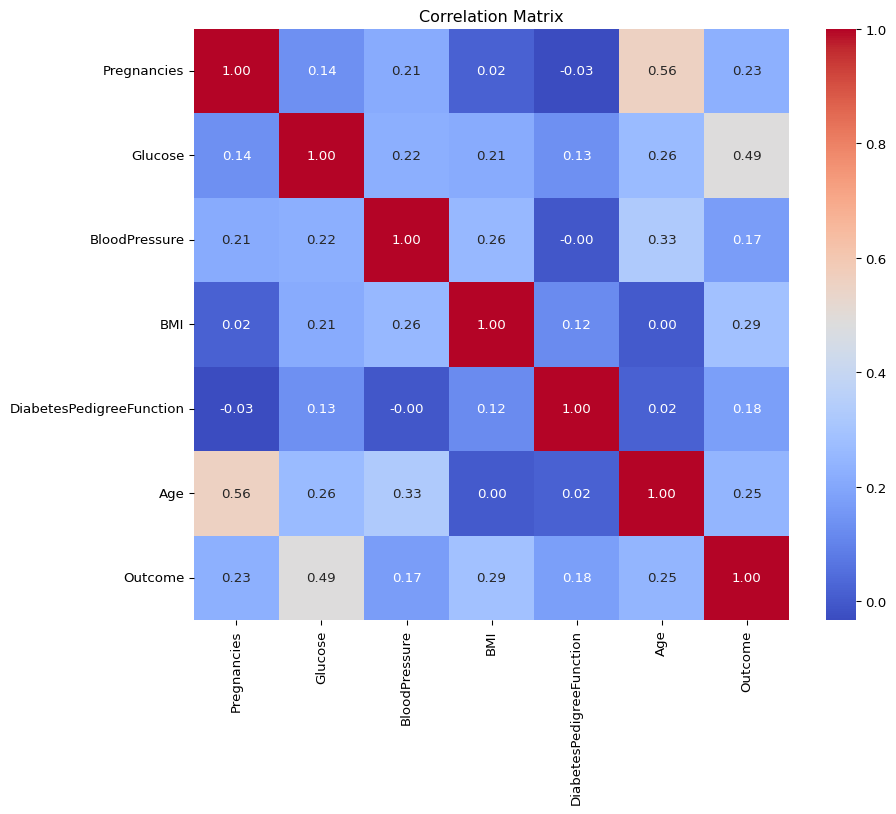

In [ ]:
corr = cleaned_df.corr() # calculates the correlation matrix for your dataset
import seaborn as sns # Imports Seaborn, a high-level plotting library built on top of Matplotlib

plt.figure(figsize=(10, 8), dpi=96) # Creates a new figure (plotting area)

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm') # The data (your correlation matrix) ,
plt.title('Correlation Matrix')    # Shows the actual correlation numbers inside each cell,
plt.show()                         # Formats the numbers to 2 decimal places ,
                    # Color map — blue for negative, red for positive correlations

In [47]:
print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.487500
BMI                         0.286753
Age                         0.245132
Pregnancies                 0.227508
DiabetesPedigreeFunction    0.176716
BloodPressure               0.169079
Name: Outcome, dtype: float64


In [ ]:
cleaned_df['Outcome'].value_counts()
# Counts how many rows have each unique value in the Outcome column.

Outcome
0    478
1    250
Name: count, dtype: int64

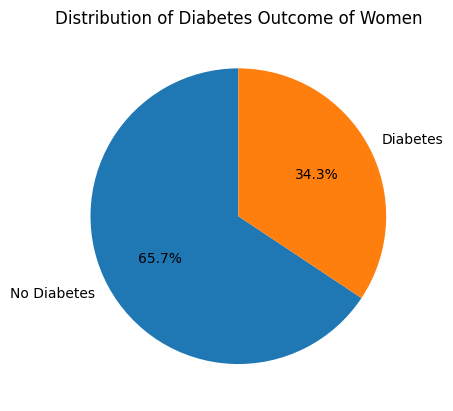

In [ ]:
plt.pie(cleaned_df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
#autopct - Displays the percentage on the chart (1 decimal place)
#startangle=90 - Rotates the pie chart so it starts at the top (for neatness)

plt.title('Distribution of Diabetes Outcome of Women')
plt.show()

x='Age' → the variable you’re analyzing

hue='Outcome' → colors the bars by diabetes outcome (0 = no, 1 = yes)

bins=20 → number of histogram bins

kde=True → adds a smooth curve (Kernel Density Estimate)

palette='coolwarm' → color scheme (red-blue)

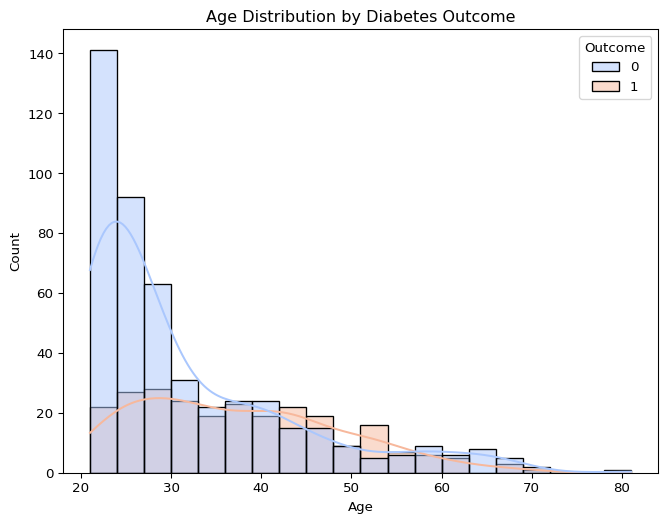

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=96)
sns.histplot(data=cleaned_df, x='Age', hue='Outcome', bins=20, kde=True, palette='coolwarm')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13136\3886898662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=cleaned_df, palette='Set2')


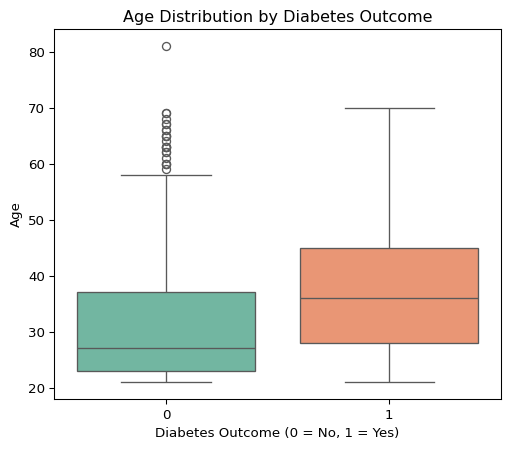

In [53]:
plt.figure(figsize=(6, 5), dpi=96)
sns.boxplot(x='Outcome', y='Age', data=cleaned_df, palette='Set2')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13136\2579785671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=cleaned_df, palette='muted')


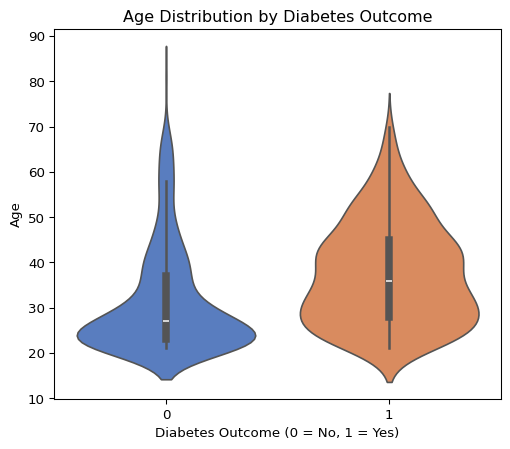

In [54]:
plt.figure(figsize=(6, 5), dpi=96)
sns.violinplot(x='Outcome', y='Age', data=cleaned_df, palette='muted')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


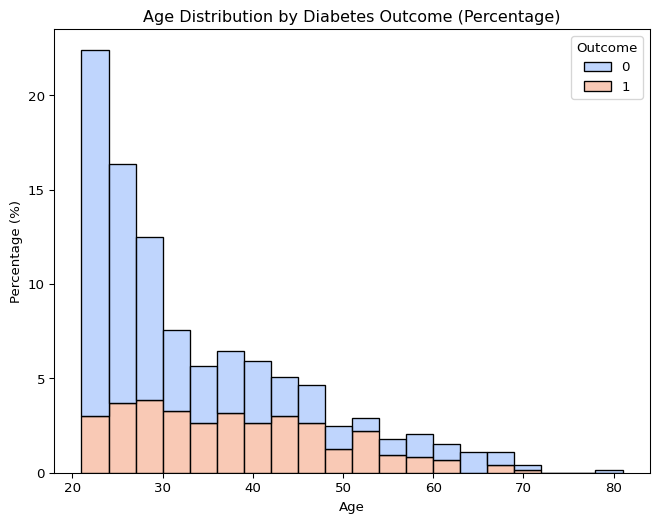

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=96)

# Plot histogram
sns.histplot(
    data=cleaned_df, 
    x='Age', 
    hue='Outcome', 
    bins=20, 
    stat='percent',       # <-- this makes it show percentages
    multiple='stack',     # stacked histogram for comparison
    palette='coolwarm',
    kde=False             # you can turn on KDE if you want
)

plt.title('Age Distribution by Diabetes Outcome (Percentage)')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.show()
